At this point we have a single channel of all the voices

In [9]:
import scipy
import matplotlib.pyplot as plt
import ipynb
import pandas as pd
import numpy as np
from ipynb.fs.full.OrganizeAudio import organizeAudio

In [100]:
def get_loudness_stats(filename):
    divided_data = np.load(filename, allow_pickle=True)

    # Average data to step size
    avg_step = 400
    avg_data = np.mean(divided_data[1][:(len(divided_data[1])//avg_step)*avg_step].reshape(-1,avg_step), axis=1)

    #apply envelope
    hilbert_transformed = np.abs(scipy.signal.hilbert(avg_data))

    plt.figure(0)
    plt.plot(hilbert_transformed, label = "envelope")
    plt.plot(avg_data)


    ##Alternate envelope makes smoother curves
    # b, a = scipy.signal.ellip(4, 0.01, 120, 0.125)
    # fgust = scipy.signal.filtfilt(b, a, hilbert_transformed, method="gust")
    # fpad = scipy.signal.filtfilt(b, a, hilbert_transformed, padlen=50)
    # plt.figure(2)
    # plt.plot(avg_data)
    # plt.plot(fgust, 'b-', linewidth=4, label='gust')
    # plt.plot(fpad, 'c-', linewidth=1.5, label='pad')

    #remove silence 
    avg = np.mean(hilbert_transformed);
    silence_factor = 3
    silenced = remove_silence_from(avg_data, avg/silence_factor)
    plt.figure(1)
    plt.plot(silenced)

    #return mean and median
    mean = np.mean(silenced)
    median = np.median(silenced)

    return mean, median


In [99]:
def remove_silence_from(amplitudes, threshold):
    silenced = []
    for x in amplitudes:
        if x >= threshold:
            silenced.append(x)
    return silenced

(159.24867615925427, 103.17644160637553)

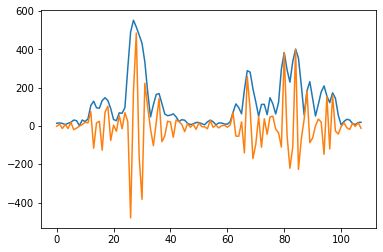

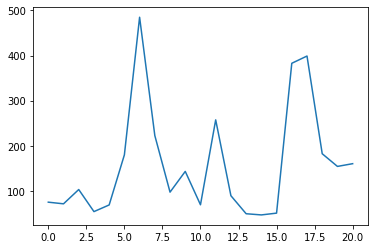

In [101]:
get_loudness_stats("data/segmented_voice_data.npy")